# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 9381 Шахин Никита и Аухадиев Александр. Вариант №7

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный сигнал:** $x_0, x_1, x_2, ..., x_{N-1}$, как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $s(t)$ 

Будем считать, что отсчеты $x_k, k = 0,1,2,3, ..., N-1$ дискретного
сигнала получены в результате равномерной
дискретизации сигнала $s(t)$  с шагом дискретизации,
равным единице: $x_k = s(t_k), k = 0,1,2,3, ..., N-1; t_k - t_{k-1} = T, k = 1,2,3, ..., N-1; T = 1$

Если на самом деле $t_k - t_{k-1} = \Delta t, k = 1,2,3, ..., N-1; \Delta t \ne 1 $
то вводим в рассмотрение $\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

В результате получим: $\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

**Дискретное преобразование Фурье** Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле: $X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$ или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \dfrac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$



## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [35]:
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, rfft, fftfreq
import matplotlib.pyplot as plt

def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

1. Сформируем дискретный сигнал $x_0,x_1,x_2,...,x_{N-1}$ посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не превышает $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализуем коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

$x_t = s(t_k)$; $k=0,1,...,N-1$; $t_k - t_{k-1} = T$; $k=1,2,...,N-1$:

In [11]:
def get_analog(n):
    ws = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    us = np.random.random(size=11)/2.
    As = np.random.randint(1, 11, 11)
    x = np.linspace(0, 32, n)
    y = 0
    for w, u, A in zip(ws, us, As):
        y += A*np.cos(w*x + u)
    y = y / np.sum(As)
    return x, y

def get_discrete(y):
    out_x = np.linspace(0, 32, 32)
    out_y = []
    for idx in range(32):
        out_y.append(y[idx * 8])
    return out_x, np.array(out_y)

2. Визуализируем исходные аналоговый и дискретизированныйсигналы на интервале $k \in [0;31]$:

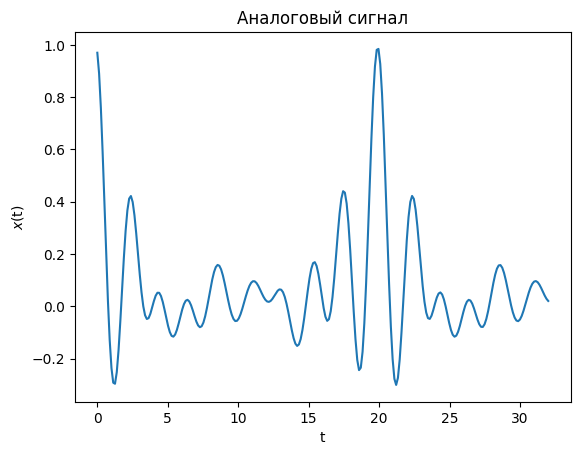

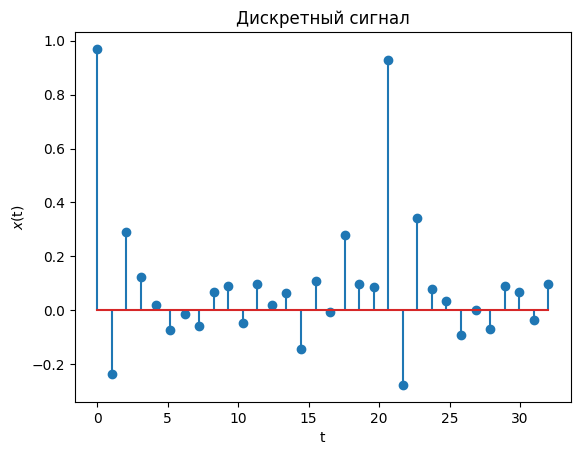

In [13]:
x, y = get_analog(256)
plt.plot(x, y)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Аналоговый сигнал')
plt.show()

x_disc, y_disc = get_discrete(y)
plt.stem(x_disc, y_disc)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал')
plt.show()

3. С помощью ДПФ найдем дискретные отсчеты спектра дискретного сигнала и визуализируем их. Рассмотрим фрагмент последовательности $\{x_k\}$ из отсчётов $N = 20$. Получим дискретную функцию с периодом $NT$, где $T$ - период дискретизации:

$s(t) = \sum\limits_{k = -\infty}^{+\infty} x_k \delta(t - kT)$

Спектр $s(t)$ также должен быть периодическим (с периодом ${{2\pi} \over T}$) и дискретным расстоянием между гармониками ${{2\pi} \over {NT}}$.

Поскольку $s(t)$ - периодическая функция, то мы можем разложить ее в ряд Фурье с помощью ДПФ. Получим дискретные отсчеты спектра и визуализируем их:

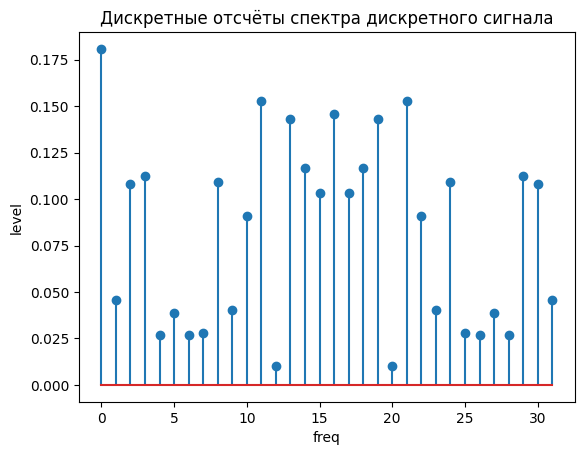

In [14]:
x, y = x_disc, y_disc
plt.stem(2*np.abs(fft(y))/32)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала')
plt.show()

Спектр симметричен относительно нуля, он представляет собой разложение исходного сигнала на линейную комбинацию простых
синусоидальных функций и отражает амплитуды этих функций на разных частотах. Спектр имеет периодичность с шагом 1.

4. Для дискретного сигнала применим линейное сглаживание по 5-ти и 9-ти точкам, представим формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Передаточные функции фильтра для 5 и 9 точек:

$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

По данным передаточным функциям выведем формулу для линейного сглаживания по 5 точкам и 9 точкам:

$y_{n,5} = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$

$y_{n,9} = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$

In [23]:
av_y_5 = np.convolve(y, np.ones(5), 'same') / 5
av_y_9 = np.convolve(y, np.ones(9), 'same') / 9

5. Визуализируем полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом:

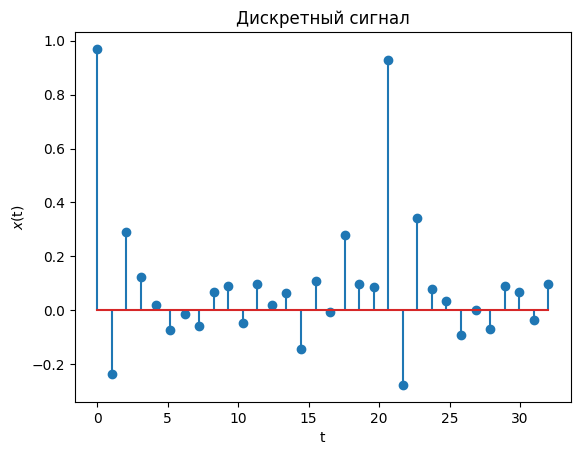

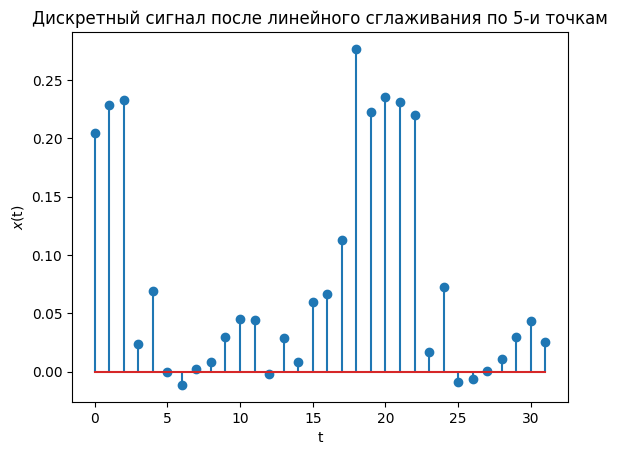

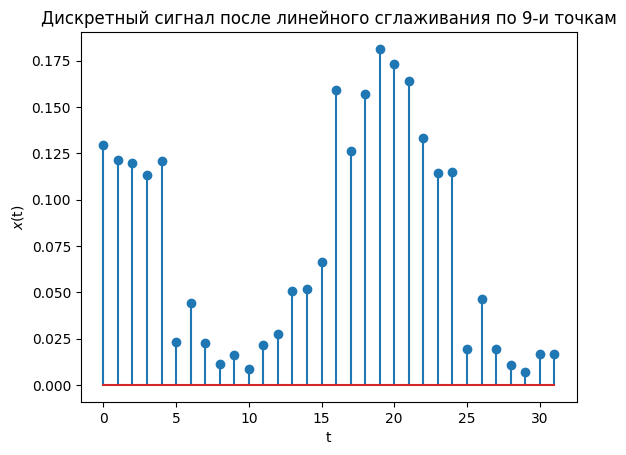

In [24]:
plt.stem(x, y)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал')
plt.show()

plt.stem(av_y_5)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал после линейного сглаживания по 5-и точкам')
plt.show()

plt.stem(av_y_9)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал после линейного сглаживания по 9-и точкам')
plt.show()

6. С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отсчетами спектра исходного дискретного сигнала.

Дискретное преобразование Фурье (ДПФ):

$X(n) = \sum\limits_{k=0}^{N-1}y_k e^{-i {{2\pi n} \over N} k}$, $n = 0,1,2,\dots,N-1$

Построим графики:

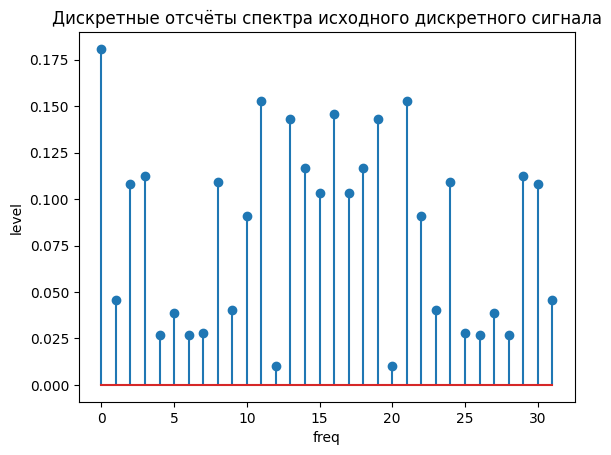

In [25]:
f = fft(y)
f = 2*np.abs(f) / len(f)
f_5 = fft(av_y_5)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(av_y_9)
f_9 = 2 * np.abs(f_9) / len(f_9)
plt.stem(f)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра исходного дискретного сигнала')
plt.show()

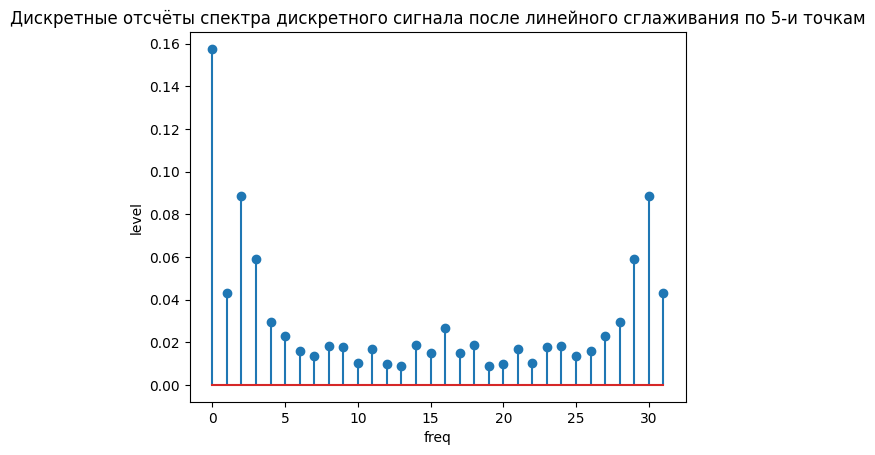

In [26]:
plt.stem(f_5)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала после линейного сглаживания по 5-и точкам')
plt.show()

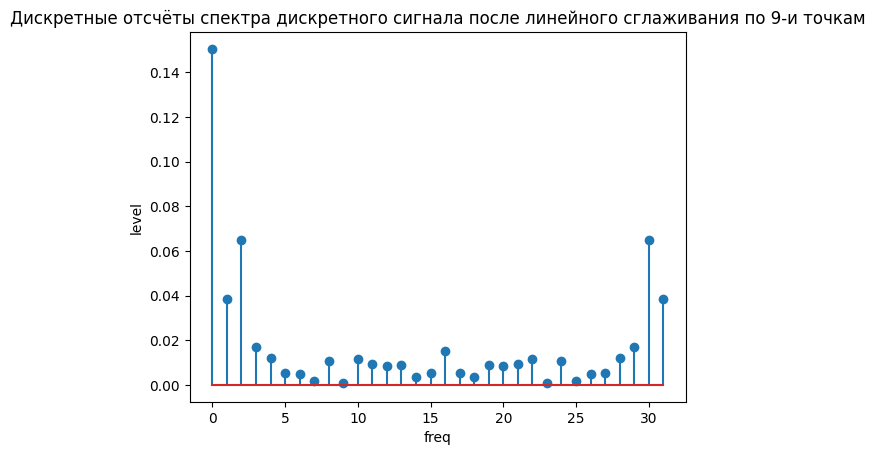

In [27]:
plt.stem(f_9)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала после линейного сглаживания по 9-и точкам')
plt.show()

Из спектра видно, что без ослабления пропускается только сигнал постоянного уровня (нулевой частоты). С увеличением числа точек полоса пропускания становится уже.

7. Проанализируем результат на соответствие значениям $H(\omega)$.

Преобразование Фурье сопоставляет непрерывной во времени бесконечной функции $y_n$ другую, непрерывную по частоте, бесконечную функцию - спектр $X(n)$. Графики подтверждают ранее сделанные выводы относительно полосы пропускания и ослабления уровня.

8. Повторим пп. 4-7 для следующих фильтров:

a. Сглаживание полиномом 2-й степени по 5 и 9 узлам.

Для дискретного сигнала применим сглаживание полиномом второй степени по 5 и 9 узлам:

$y_5(n) = \frac1{35}(-3x_{k-2} + 12x_{k-1} + 17x_k +12x_{k+1} - 3x_{k+2})$

$y_9(n) = \frac1{231}(-21x_{k-4} + 14x_{k-3} + 39x_{k-2} + 54x_{k-1} + 59x_k + 54x_{k+1} + 39x_{k+2} + 14x_{k+3} - 21x_{k+4})$

Формула для передаточной функции (частотной характеристики) фильтра:

$H_5(\omega) = \frac1{35}(17 + 24\cos\omega - 6\cos{2\omega})$

$H_9(\omega) = \frac1{231}(59 + 108\cos\omega + 78\cos{2\omega} + 28\cos{3\omega} - 42\cos{4\omega})$

Визуализируем полученный после фильтрации дискретный сигнал:

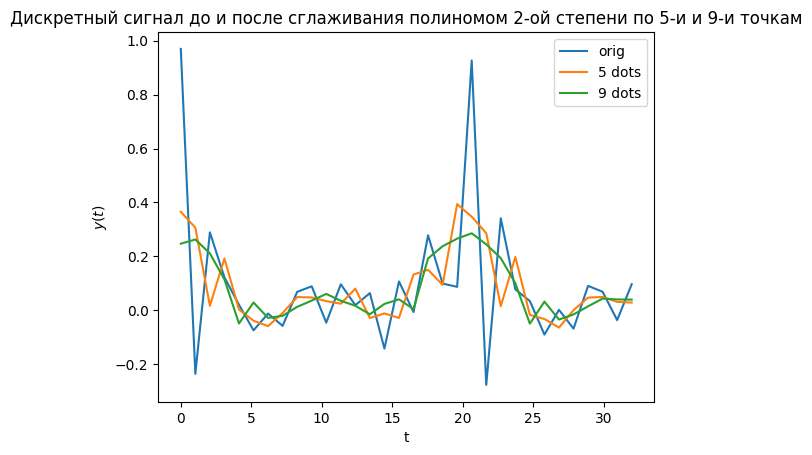

In [44]:
av_y_5 = np.convolve(y, np.array([-3, 12, 17, 12, -3]), 'same') / 35
av_y_9 = np.convolve(y, np.array([-21, 14, 39, 54, 59, 54, 39, 14,-21]), 'same') / 231
plt.plot(x, y, label='orig')
plt.plot(x, av_y_5, label='5 dots')
plt.plot(x, av_y_9, label='9 dots')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title("Дискретный сигнал до и после сглаживания полиномом 2-ой степени по 5-и и 9-и точкам")
plt.show()

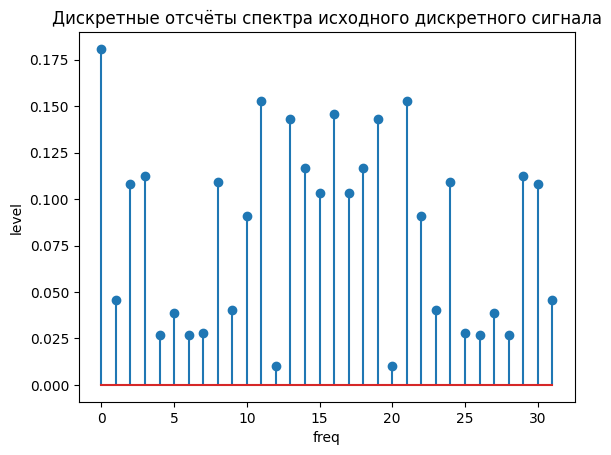

In [49]:
f = fft(y)
f = 2*np.abs(f) / len(f)
f_5 = fft(av_y_5)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(av_y_9)
f_9 = 2 * np.abs(f_9) / len(f_9)

plt.stem(f)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра исходного дискретного сигнала')
plt.show()

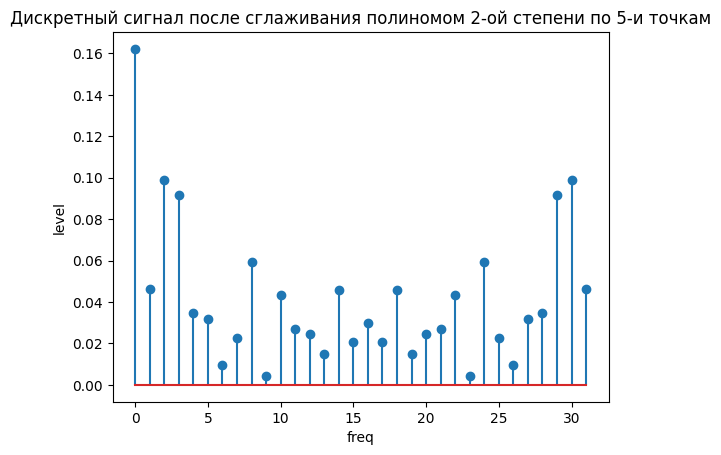

In [50]:
plt.stem(f_5)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретный сигнал после сглаживания полиномом 2-ой степени по 5-и точкам')
plt.show()

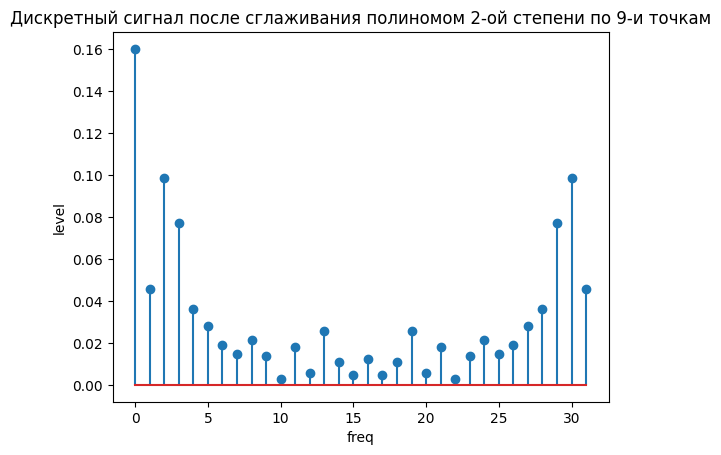

In [51]:
plt.stem(f_9)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретный сигнал после сглаживания полиномом 2-ой степени по 9-и точкам')
plt.show()

Из графиков видно, что при увеличении числа точек увеличивается крутизна среза и уменьшается полоса пропускания. Также присутствует более «пологая» часть в полосе пропускания около 0, в отличие от линейного фильтра, поэтому пропускаются сигналы низкой частоты почти без потери амплитуды в более широком диапазоне.

b. Сглаживание полиномом 4-й степени по 7 и 11 узлам.

Для дискретного сигнала применим сглаживание полиномом четвёртой степени по 7 и 11 узлам:

$y_7(n) = \frac1{231}(5x_{k-3} - 30x_{k-2} + 75x_{k-1} + 131x_k + 75x_{k+1} - 30x_{k+2} + 5x_{k+3})$

$y_{11}(n) = \frac1{429} (13x_{k-5} - 45x_{k-4} - 10x_{k-3} + 60x_{k-2} + 120x_{k-1} + 143x_k + 120x_{k+1} + 60x_{k+2} - 10x_{k+3} - 45x_{k+4} - 13x_{k+5})$

Представим формулу для передаточной функции (частотной характеристики) фильтра:

$H_7(\omega) = \frac1{231}(131 + 150\cos\omega - 60\cos{2\omega} + 10\cos{3\omega})$

$H_{11}(\omega) = \frac1{429}(143 + 240\cos\omega + 120\cos{2\omega} - 20\cos{2\omega} - 90\cos{4\omega} + 26\cos{5\omega})$

Построим графики:

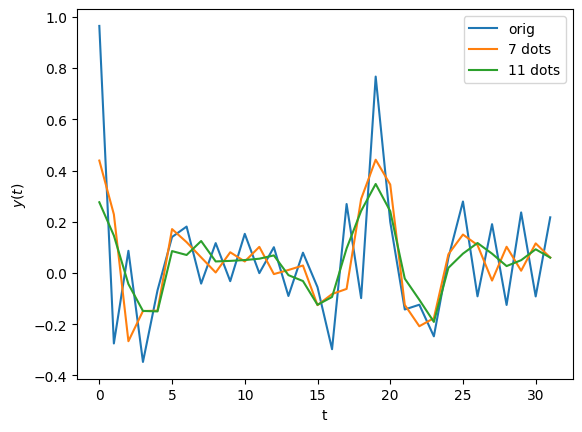

In [56]:
av_y_7 = np.convolve(y, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
av_y_11 = np.convolve(y, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

plt.plot(y, label='orig')
plt.plot(av_y_7, label='7 dots')
plt.plot(av_y_11, label='11 dots')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title("Дискретные сигналы до и после сглаживания полиномом 4-ой степени по 7-и и по 11-и точкам")
plt.show()

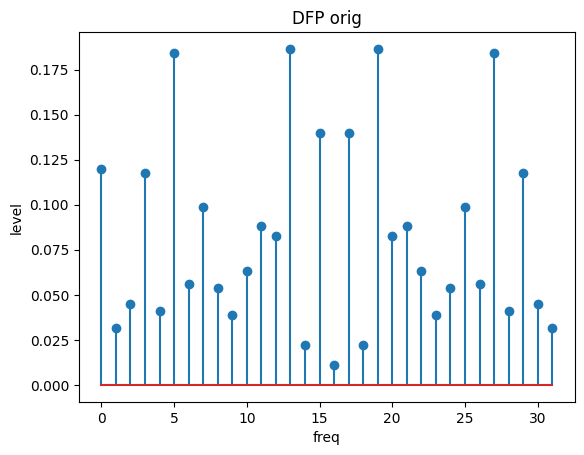

In [59]:
f = fft(y)
f = 2*np.abs(f) / len(f)
f_7 = fft(av_y_7)
f_7 = 2 * np.abs(f_7) / len(f_7)
f_11 = fft(av_y_11)
f_11 = 2 * np.abs(f_11) / len(f_11)

plt.stem(f)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('DFP orig')
plt.title("Дискретные отчёты спектра исходного дискретного сигнала")
plt.show()

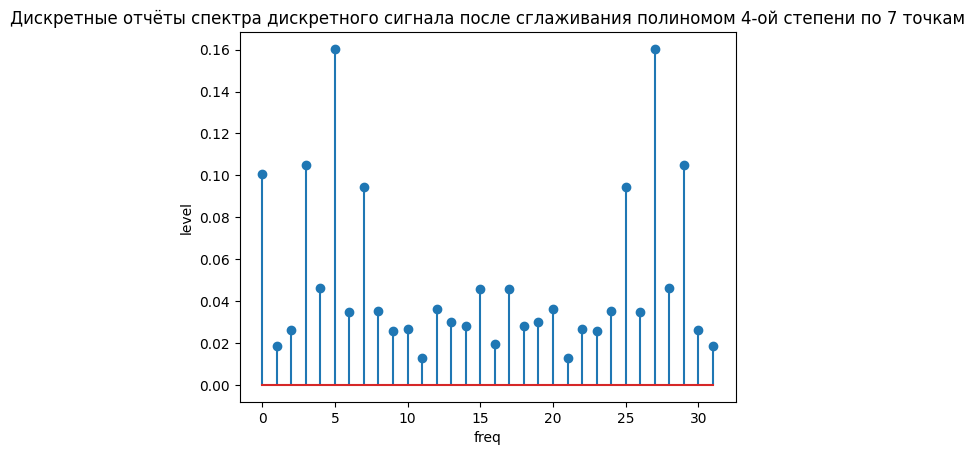

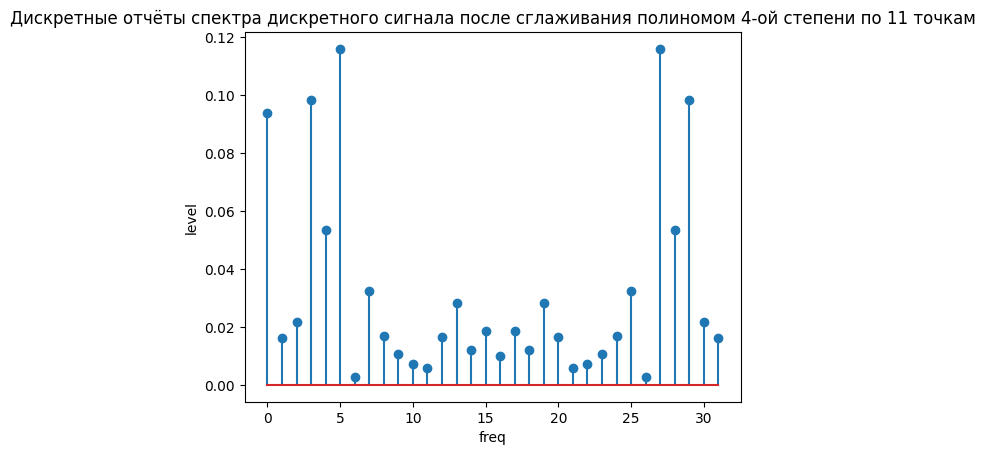

In [60]:
plt.stem(f_7)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('DFP 7 dots')
plt.title("Дискретные отчёты спектра дискретного сигнала после сглаживания полиномом 4-ой степени по 7 точкам")
plt.show()

plt.stem(f_11)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('DFP 11 dots')
plt.title("Дискретные отчёты спектра дискретного сигнала после сглаживания полиномом 4-ой степени по 11 точкам")
plt.show()

Полученные спектры после фильтрации схожи с таковыми при сглаживании полиномом 2-й степени, однако здесь наблюдается еще более широкая пологая часть пропускания низких частот почти без ослабления. При сглаживании по 11-ти точкам можно увидеть, что полоса пропускания становится уже, что видно на спектре: большее число дискретных отсчетов ослабляется.

## Выводы

В результате выполнения лабораторной работы был сгенерирован аналоговый сигнал, дискретизирован, построен спектр дискретного сигнала. Было выяснено, что спектр дискретного сигнала симметричен относительно 0, в спектре (представление в виде дискретных отсчетов) представлено множество частот. 
Были применены фильтры: линейного сглаживания, сглаживания полиномом 2-й и 4-й степени, построены графики сигнала и спектра. В результате по спектру было определено, что обеспечивается фильтрация высоких частот, ширина полосы пропускания уменьшается с увеличением числа точек, равномерность передачи сигнала в полосе пропускания увеличивается при использовании полиномов более высоких порядков.